In [37]:
from google.colab import files
uploaded = files.upload()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey (3).csv


In [38]:
import pandas as pd
df=pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [39]:
df.dtypes

,0
EmployeeID,int64
Age,int64
Gender,object
Country,object
JobRole,object
Department,object
YearsAtCompany,int64
WorkHoursPerWeek,int64
RemoteWork,object
BurnoutLevel,float64


In [72]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols)
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

Categorical Columns: Index([], dtype='object')


In [75]:
df.head()

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,...,RemoteWork_Yes,HasMentalHealthSupport_Yes,HasTherapyAccess_Yes,SalaryRange_40K-60K,SalaryRange_60K-80K,SalaryRange_80K-100K,SalaryRange_<40K,Stress_x_WorkHours,Stress_minus_sleep,Stress_x_sleep
0,0.000000,0.756757,0.70,0.586207,0.263333,0.451111,0.941111,0.351111,0.60,0.79,...,False,False,True,True,False,False,False,0.559771,0.674958,0.674958
1,0.000333,0.378378,0.05,1.000000,0.710000,0.111111,0.516667,0.304444,0.64,0.90,...,False,True,True,False,False,True,False,0.524239,0.438666,0.438666
2,0.000667,0.189189,0.65,1.000000,0.677778,0.685556,0.522222,0.866667,0.24,0.97,...,False,False,False,False,False,True,False,0.529876,0.644997,0.644997
3,0.001000,0.540541,0.75,0.034483,0.353333,0.306667,0.600000,0.410000,0.94,0.58,...,True,True,True,False,True,False,False,0.020993,0.328434,0.328434
4,0.001334,0.486486,0.30,0.137931,0.808889,0.148889,0.267778,0.124444,0.04,0.33,...,True,True,True,False,False,False,True,0.037476,0.617298,0.617298


In [60]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

<Axes: >

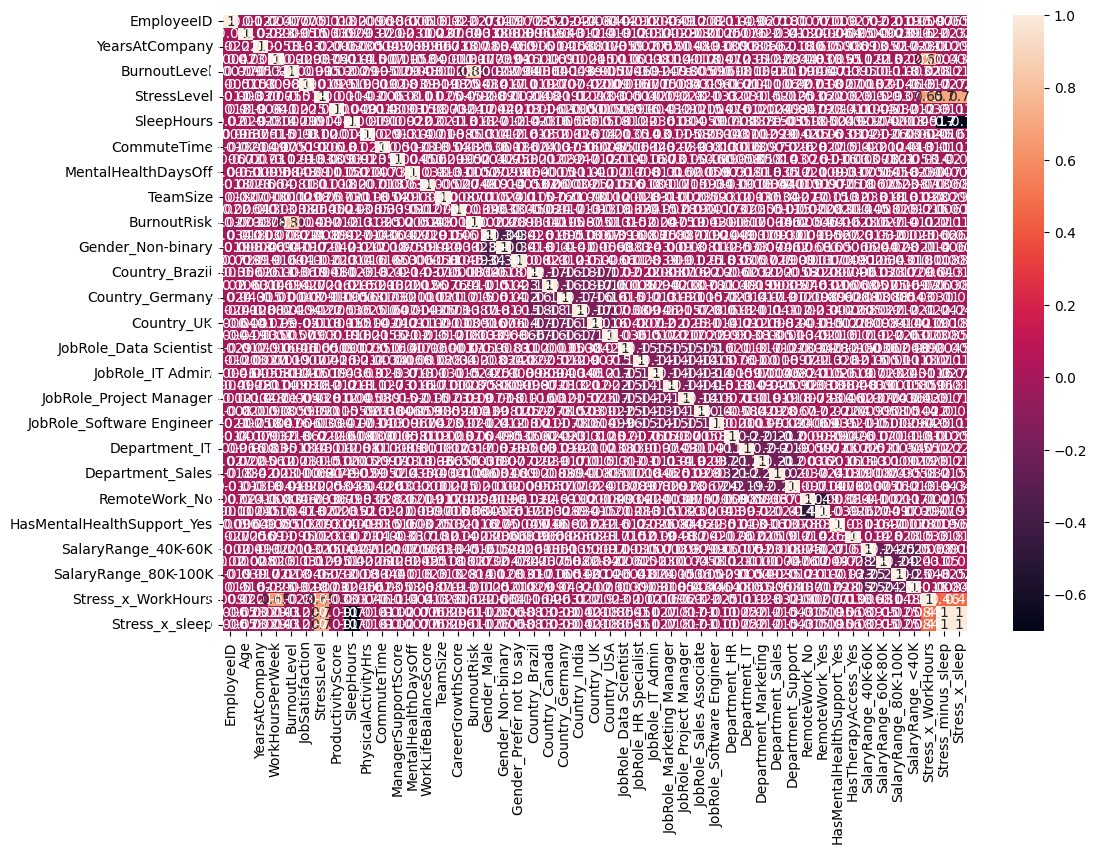

In [61]:
#correlation

import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [62]:
#mutual

from sklearn.feature_selection import mutual_info_regression
X = df.drop('StressLevel', axis=1)
y = df['StressLevel']
mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Score': mi_scores})
mi_df = mi_df.sort_values('Score', ascending=False)
print(mi_df)

                       Feature     Score
45          Stress_x_WorkHours  0.729372
47              Stress_x_sleep  0.495989
46          Stress_minus_sleep  0.495553
7                   SleepHours  0.016157
21             Country_Germany  0.010366
14           CareerGrowthScore  0.009395
32               Department_HR  0.008795
33               Department_IT  0.008785
10         ManagerSupportScore  0.007887
42         SalaryRange_60K-80K  0.006563
26       JobRole_HR Specialist  0.005522
15                 BurnoutRisk  0.005328
22               Country_India  0.004576
19              Country_Brazil  0.003548
25      JobRole_Data Scientist  0.003492
44            SalaryRange_<40K  0.003311
27            JobRole_IT Admin  0.003143
37               RemoteWork_No  0.003047
41         SalaryRange_40K-60K  0.002879
2               YearsAtCompany  0.001937
3             WorkHoursPerWeek  0.001632
43        SalaryRange_80K-100K  0.001623
6            ProductivityScore  0.001020
34        Depart

In [59]:
df['Stress_x_WorkHours'] = df['StressLevel'] * df['WorkHoursPerWeek']
df['Stress_x_sleep'] = df['StressLevel'] - df['SleepHours']

In [63]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop('StressLevel', axis=1)
y = df['StressLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
    print("-" * 30)

Linear Regression
MSE: 2.0810366383884064e-30
R² Score: 1.0
------------------------------
Ridge Regression
MSE: 6.944617116627137e-05
R² Score: 0.999134104920143
------------------------------
Lasso Regression
MSE: 0.08023776724022631
R² Score: -0.00045094935009060144
------------------------------
